In [1]:
# autor: https://github.com/alfredoalvaradoenciso/wbg-wdi/blob/main/scrap-bar-graph.py
# pip install BeautifulSoup4



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def extract_pages_value(url):
    response = requests.get(url)
    if response.status_code == 200:
        content = response.content.decode('utf-8')  # Decode response content as text
        first_two_lines = content.split("\n", 2)[:2]
        for line in first_two_lines:
            pages_match = re.search(r'pages="(\d+)"', line)
            if pages_match:
                pages_value = int(pages_match.group(1))
                return pages_value
    return None

# URL for the World Bank API
url = "https://api.worldbank.org/v2/country/LCN;EAP;WLD;ECA/indicator/NY.GDP.MKTP.KD.ZG?date=1980:2021"

# Extract the value of "pages"
pages_value = extract_pages_value(url)
perpage = pages_value*50
url = f"https://api.worldbank.org/v2/country/LCN;EAP;WLD;ECA/indicator/NY.GDP.MKTP.KD.ZG?date=1980:2021&per_page={perpage}"


# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        soup = BeautifulSoup(response.content, "xml")

        # Extract the relevant data from the API response
        extracted_data = []
        for data_element in soup.find_all("data"):
            countryiso3code = data_element.find("countryiso3code").text
            date = int(data_element.find("date").text)
            value = data_element.find("value").text
            if value.strip() == "":
                value = None
            else:
                value = float(value)
            extracted_data.append({"countryiso3code": countryiso3code, "date": date, "value": value})

        # Create a DataFrame from the extracted data
        df = pd.DataFrame(extracted_data)
        print(df)

    except Exception as e:
        print("Error parsing XML:", e)

else:
    print("Error: Unable to fetch data from the API.")
    
df = df.pivot_table(index='date', columns='countryiso3code', values='value', aggfunc='first')



    countryiso3code  date     value
0               EAP  2021  7.601224
1               EAP  2021  7.601224
2               EAP  2020  1.246173
3               EAP  2019  5.781694
4               EAP  2018  6.524927
..              ...   ...       ...
164             WLD  1984  4.711277
165             WLD  1983  2.602788
166             WLD  1982  0.300389
167             WLD  1981  2.012104
168             WLD  1980  1.898538

[169 rows x 3 columns]


In [5]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df1 = df.values
df1

array([[  7.5660051 ,          nan,   6.63412238,   1.89853848],
       [  5.59859415,          nan,   1.22548491,   2.01210406],
       [  6.43794922,          nan,  -0.16872927,   0.30038913],
       [  7.73682154,          nan,  -2.27977457,   2.60278786],
       [  9.95517536,          nan,   3.89093986,   4.7112772 ],
       [  7.89879379,          nan,   3.1325736 ,   3.71791096],
       [  7.13293375,          nan,   3.47848062,   3.37663581],
       [  9.14535384,          nan,   3.29834938,   3.74394664],
       [  9.73126618,          nan,   0.61536716,   4.62591384],
       [  5.75768529,          nan,   1.71047664,   3.71093075],
       [  5.1637713 ,  -1.45700441,  -0.3741457 ,   2.80826818],
       [  8.0041157 ,  -4.91009249,   2.94911662,   1.37562352],
       [ 11.1923656 , -10.66783595,   2.57025183,   2.04760184],
       [ 11.28641466,  -5.93168409,   4.39258614,   1.84383059],
       [ 10.93634731, -11.16687233,   5.22517675,   3.32606178],
       [  9.87477803,  -1

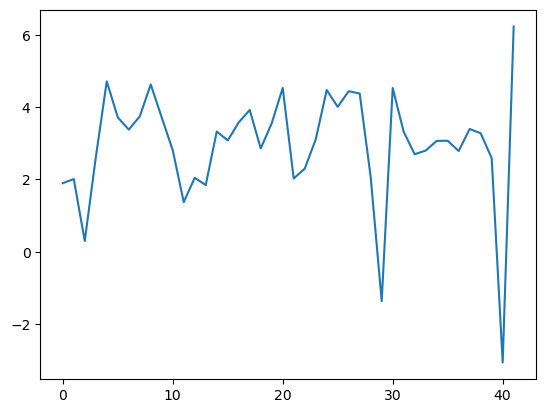

In [12]:
import matplotlib.pyplot as plt

plt.plot(df1[:,3]) 


## scrap-bar-graph.py

C:\Users\HP SUPPORT\AppData\Local\Temp\ipykernel_6040\4271531275.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collapsed_data = df.groupby('date').agg({'EAP': 'mean', 'ECA': 'mean', 'LCN': 'mean', 'WLD': 'mean'}).reset_index()
posx and posy should be finite values


    countryiso3code  date     value
0               EAP  2021  7.601224
1               EAP  2021  7.601224
2               EAP  2020  1.246173
3               EAP  2019  5.781694
4               EAP  2018  6.524927
..              ...   ...       ...
164             WLD  1984  4.711277
165             WLD  1983  2.602788
166             WLD  1982  0.300389
167             WLD  1981  2.012104
168             WLD  1980  1.898538

[169 rows x 3 columns]


posx and posy should be finite values


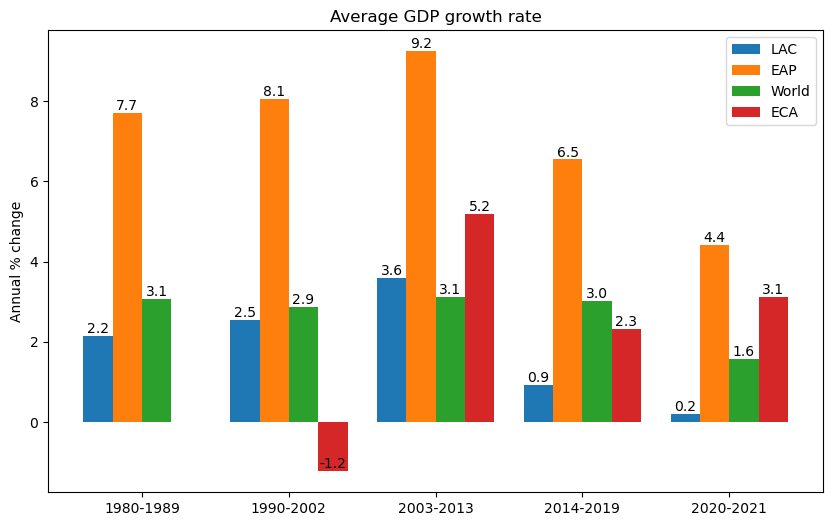

In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

#import wbgapi as wb   # I use wb as a namespace in all my work
import matplotlib.pyplot as plt

def extract_pages_value(url):
    response = requests.get(url)
    if response.status_code == 200:
        content = response.content.decode('utf-8')  # Decode response content as text
        first_two_lines = content.split("\n", 2)[:2]
        for line in first_two_lines:
            pages_match = re.search(r'pages="(\d+)"', line)
            if pages_match:
                pages_value = int(pages_match.group(1))
                return pages_value
    return None

# URL for the World Bank API
url = "https://api.worldbank.org/v2/country/LCN;EAP;WLD;ECA/indicator/NY.GDP.MKTP.KD.ZG?date=1980:2021"

# Extract the value of "pages"
pages_value = extract_pages_value(url)
perpage = pages_value*50
url = f"https://api.worldbank.org/v2/country/LCN;EAP;WLD;ECA/indicator/NY.GDP.MKTP.KD.ZG?date=1980:2021&per_page={perpage}"


# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        soup = BeautifulSoup(response.content, "xml")

        # Extract the relevant data from the API response
        extracted_data = []
        for data_element in soup.find_all("data"):
            countryiso3code = data_element.find("countryiso3code").text
            date = int(data_element.find("date").text)
            value = data_element.find("value").text
            if value.strip() == "":
                value = None
            else:
                value = float(value)
            extracted_data.append({"countryiso3code": countryiso3code, "date": date, "value": value})

        # Create a DataFrame from the extracted data
        df = pd.DataFrame(extracted_data)
        print(df)

    except Exception as e:
        print("Error parsing XML:", e)

else:
    print("Error: Unable to fetch data from the API.")

df = df.pivot_table(index='date', columns='countryiso3code', values='value', aggfunc='first')

# Missing values
#df['ECA'] = df['ECA'].fillna(0)
df.reset_index(inplace=True)

#rename data column
df.rename(columns={'date': 'year'}, inplace=True)

# Recode based on the specified intervals
df['date'] = pd.cut(df['year'], [1979, 1989, 2002, 2013, 2019, 2022], labels=[1, 2, 3, 4, 5])

# Define labels for 'date'
date_labels = {1: "1980-1989", 2: "1990-2002", 3: "2003-2013", 4: "2014-2019", 5: "2020-2021"}
df['date'] = df['date'].map(date_labels)

# Collapse the data by 'date' and calculate the mean of 'EAP', 'ECA', 'LCN', and 'WLD'
collapsed_data = df.groupby('date').agg({'EAP': 'mean', 'ECA': 'mean', 'LCN': 'mean', 'WLD': 'mean'}).reset_index()

width = 0.2
date_values = collapsed_data['date'].unique()
x = range(len(date_values))

%matplotlib inline

plt.figure(figsize=(10, 6))
plt.bar(x, collapsed_data['LCN'], width=width, label="LAC")
plt.bar([i + width for i in x], collapsed_data['EAP'], width=width, label="EAP")
plt.bar([i + 2 * width for i in x], collapsed_data['WLD'], width=width, label="World")
plt.bar([i + 3 * width for i in x], collapsed_data['ECA'], width=width, label="ECA")

plt.xlabel("")
plt.ylabel("Annual % change")
plt.title("Average GDP growth rate")
plt.xticks([i + 1.5 * width for i in x], date_values)
plt.legend()

# Annotate the bars with their values
for i in x:
    plt.text(i, collapsed_data['LCN'][i], f"{collapsed_data['LCN'][i]:.1f}", ha='center', va='bottom')
    plt.text(i + width, collapsed_data['EAP'][i], f"{collapsed_data['EAP'][i]:.1f}", ha='center', va='bottom')
    plt.text(i + 2 * width, collapsed_data['WLD'][i], f"{collapsed_data['WLD'][i]:.1f}", ha='center', va='bottom')
    plt.text(i + 3 * width, collapsed_data['ECA'][i], f"{collapsed_data['ECA'][i]:.1f}", ha='center', va='bottom')


plt.show()